In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [9]:
# read in data

df_path = '/Users/sarabinder/Desktop/To_Do/Wichtig/rf_test/complete_df.csv'
data_df = pd.read_csv(df_path, index_col = 0)

In [10]:
# get data ready (copied from random forest notebook)

for i in range(len(data_df)):
    data_df.iloc[i,-1] =  data_df.iloc[i,-1].split("_rois")[0]

data_df = data_df.rename(columns = {"ID": "FILE_ID"})


pheno_df = pd.read_csv("/Users/sarabinder/Desktop/To_Do/Wichtig/rf_test/Phenotypic_V1_0b_preprocessed1.csv", index_col = 0)
diagnose_df = pheno_df.loc[:,["FILE_ID", "DX_GROUP", "DSM_IV_TR"]]


data_merged_df = pd.merge(data_df, diagnose_df, on = "FILE_ID", how = "left")
data_merged_df = data_merged_df.dropna()

# Separate features and target
X = data_merged_df.drop(["FILE_ID", "DX_GROUP", "DSM_IV_TR"], axis=1)
y = data_merged_df["DX_GROUP"]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# initiate and fit pca to training data
pca = PCA()
pca.fit(X_train)

PCA()

In [13]:
# explained variance
pca.explained_variance_ratio_

array([2.80416764e-02, 2.55759277e-02, 1.81357572e-02, 1.43660122e-02,
       1.38440957e-02, 1.24140834e-02, 1.14917882e-02, 1.00578755e-02,
       9.71854181e-03, 8.92971753e-03, 8.57366460e-03, 8.36935348e-03,
       8.14046236e-03, 7.51281694e-03, 7.38461201e-03, 7.15361237e-03,
       6.46112076e-03, 6.29833710e-03, 6.21479541e-03, 6.06730805e-03,
       5.95689810e-03, 5.81013140e-03, 5.61193364e-03, 5.45114941e-03,
       5.22497954e-03, 5.14517483e-03, 5.08599403e-03, 4.99593280e-03,
       4.89550043e-03, 4.80765720e-03, 4.74298838e-03, 4.68334825e-03,
       4.49418425e-03, 4.34810940e-03, 4.28859182e-03, 4.24251801e-03,
       4.12315342e-03, 4.08054407e-03, 4.05685236e-03, 3.97105728e-03,
       3.90887184e-03, 3.85497583e-03, 3.80294506e-03, 3.78169715e-03,
       3.69329854e-03, 3.65666139e-03, 3.63199783e-03, 3.57530951e-03,
       3.53253313e-03, 3.49165330e-03, 3.46594668e-03, 3.39166446e-03,
       3.37024442e-03, 3.31421972e-03, 3.28680537e-03, 3.23151732e-03,
      

In [14]:
# number of components
pca.n_components_

594

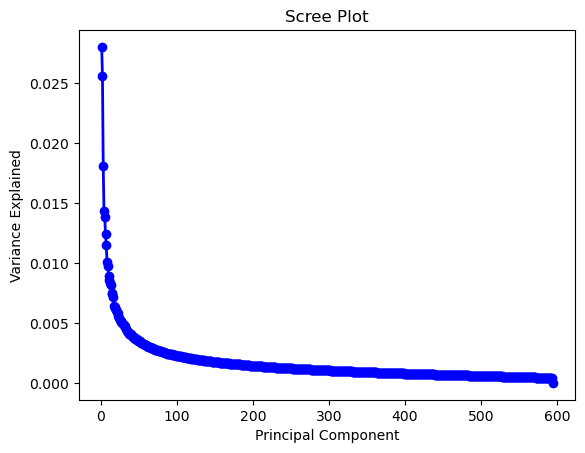

In [16]:
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [17]:
# second pca where we specify that we want as many components as we need to explain 95% of variance - lets see how many we get
pca2 = PCA(.95)
pca2.fit(X_train)

PCA(n_components=0.95)

In [20]:
pca2.n_components_
# still lots of components

494

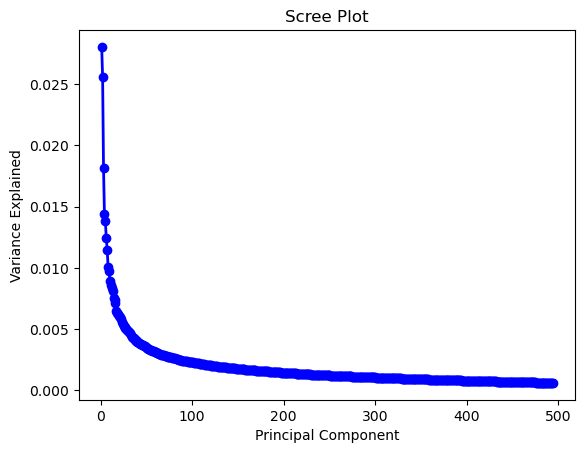

In [21]:
# plot it again

PC_values = np.arange(pca2.n_components_) + 1
plt.plot(PC_values, pca2.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [22]:
# apply pca to training and  test set
X_train_pca = pca2.fit_transform(X_train)
X_test_pca = pca2.transform(X_test)

In [27]:
pd.DataFrame(X_train_pca).to_csv("/Users/sarabinder/Desktop/To_Do/Wichtig/rf_test/X_train_pca.csv")
pd.DataFrame(X_test_pca).to_csv("/Users/sarabinder/Desktop/To_Do/Wichtig/rf_test/X_test_pca.csv")